In [27]:
import pandas as pd
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
data = pd.read_csv('student_clustering.csv')
data.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [29]:
data.isnull().sum()

cgpa    0
iq      0
dtype: int64

In [30]:
data.describe()

,cgpa,iq
count,200.000000,200.000000
mean,6.983400,101.995000
std,1.624101,12.161599
min,4.600000,83.000000
25%,5.407500,91.000000
50%,7.040000,102.000000
75%,8.585000,113.000000
max,9.300000,121.000000


In [31]:
data.drop_duplicates(inplace=True)

In [32]:
X = data.iloc[:, [0, 1]].values


C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmea

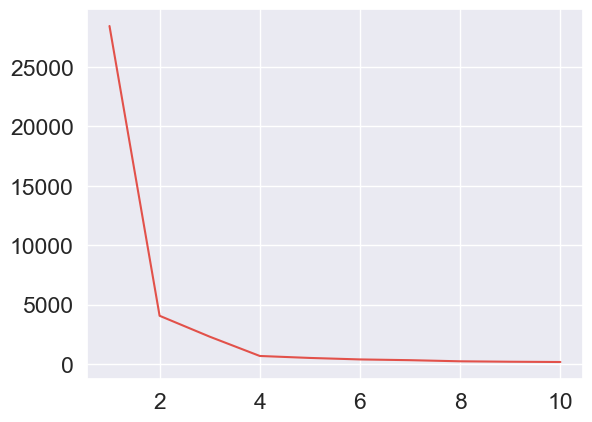

In [36]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)

In [40]:
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=0)
y_pred = kmeans.fit_predict(X)

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


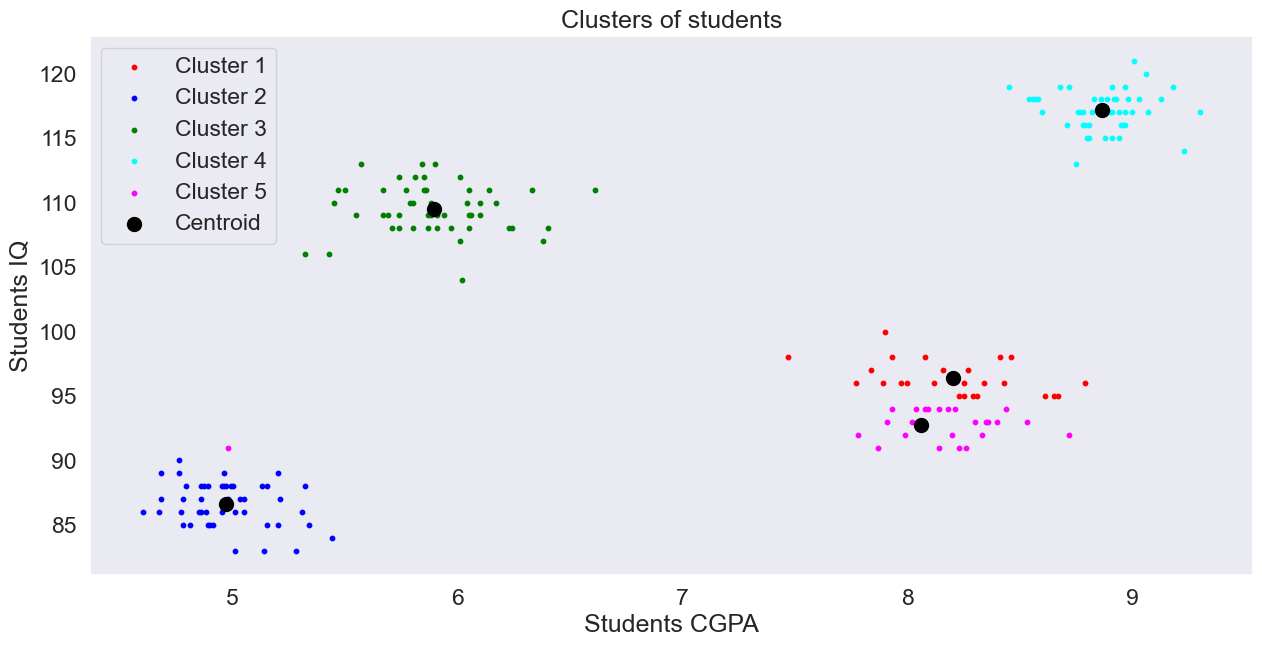

In [43]:
plt.figure(figsize=(15,7))
plt.scatter(X[y_pred == 0,0],X[y_pred == 0,1], s=10, c='red',label='Cluster 1')
plt.scatter(X[y_pred == 1,0],X[y_pred == 1,1], s=10, c='blue',label='Cluster 2')
plt.scatter(X[y_pred == 2,0],X[y_pred == 2,1], s=10, c='green',label='Cluster 3')
plt.scatter(X[y_pred == 3,0],X[y_pred == 3,1], s=10, c='cyan',label='Cluster 4')
plt.scatter(X[y_pred == 4,0],X[y_pred == 4,1], s=10, c='magenta',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='k',label='Centroid')
plt.grid(False)
plt.title('Clusters of students')
plt.xlabel('Students CGPA')
plt.ylabel('Students IQ')
plt.legend()
plt.show()

From the cluster created above it can be clearly inferred that the higher the students cgpa the higher their iq
and they become clusters based on that

In [44]:
data['cluster'] = pd.DataFrame(y_kmeans)
data.head()

,cgpa,iq,cluster
0,5.13,88,0.0
1,5.90,113,2.0
2,8.36,93,3.0
3,8.27,97,3.0
4,5.45,110,2.0


In [45]:
data.to_csv("out.csv", index = False)


In [46]:
data1 = pd.read_csv('out.csv')
data1

,cgpa,iq,cluster
0,5.13,88,0.0
1,5.90,113,2.0
2,8.36,93,3.0
3,8.27,97,3.0
4,5.45,110,2.0
...,...,...,...
188,4.68,89,NaN
189,8.57,118,NaN
190,5.85,112,NaN
191,6.23,108,NaN


In [47]:
data1.isnull().sum()

cgpa       0
iq         0
cluster    7
dtype: int64

In [48]:
data1 =data1.dropna()

In [49]:
data1

,cgpa,iq,cluster
0,5.13,88,0.0
1,5.90,113,2.0
2,8.36,93,3.0
3,8.27,97,3.0
4,5.45,110,2.0
...,...,...,...
181,8.23,91,3.0
182,8.95,116,0.0
183,6.33,111,1.0
184,8.44,94,2.0


In [50]:
data1.isnull().sum()

cgpa       0
iq         0
cluster    0
dtype: int64

In [51]:
X = data1.iloc[:, [0, 1]].values
y= data1.iloc[:, [2]].values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
model= LinearRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [53]:
y_pred

array([[1.89964164],
       [1.88333888],
       [1.98785234],
       [1.90122236],
       [1.80253744],
       [2.0305217 ],
       [1.22115529],
       [1.90455295],
       [1.81301166],
       [1.89774703],
       [1.19548851],
       [1.22735786],
       [1.80263393],
       [1.26150776],
       [1.1461943 ],
       [2.03283858],
       [1.2124911 ],
       [1.19219425],
       [1.08698096],
       [1.93021973],
       [1.24881315],
       [1.16249705],
       [1.16926664],
       [1.89112218],
       [1.90525278],
       [1.15300021],
       [1.10987224],
       [1.12256686],
       [1.93406909],
       [1.07785816],
       [1.07470863],
       [1.81462871],
       [1.12705589],
       [1.95356962],
       [1.93003866],
       [1.13368075],
       [1.08929785],
       [1.85757562],
       [1.17186107],
       [1.16291933],
       [1.89343906],
       [1.96626423],
       [1.95412472],
       [1.9311971 ],
       [1.91563051],
       [1.15040578],
       [1.89487505],
       [1.203

In [54]:
example = model.predict([[8.3,89]])

# Print prediction
print(int(example))

2
